To run this example locally, [install Ploomber](https://ploomber.readthedocs.io/en/latest/get-started/install.html) and execute: `ploomber examples -n templates/ml-intermediate`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Ftemplates/ml-intermediate%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=templates/ml-intermediate%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


# Intermediate ML project

<!-- start description -->
Training and serving ML pipelines with integration testing to evaluate training data quality.
<!-- end description -->

## Training pipeline

The training pipeline prepares some data (`get`, `sepal-area`, `petal-area`), joins everything into a single file (`join`), and fits a model (`fit`). 

  0%|          | 0/5 [00:00<?, ?it/s]

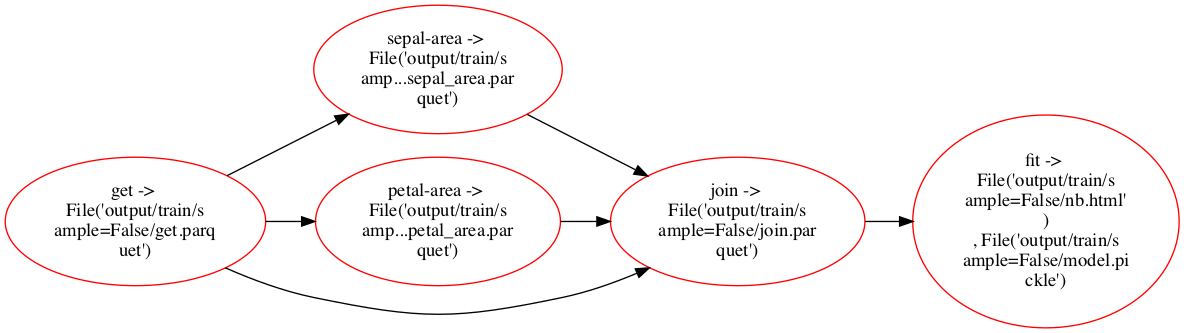

In [1]:
from ploomber.spec import DAGSpec

dag_train = DAGSpec('pipeline.yaml').to_dag()
dag_train.plot()

## Serving pipeline

The serving pipeline gets data that we want to make predictions on, generates the same features we created during training, joins everything into a single file, and makes predictions using a previously trained model.

  0%|          | 0/5 [00:00<?, ?it/s]

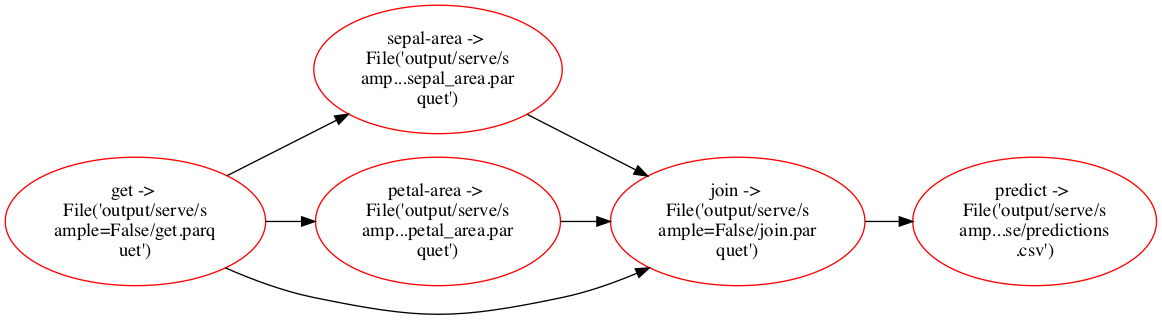

In [2]:
dag_serve = DAGSpec('pipeline.serve.yaml').to_dag()
dag_serve.plot()

## Integration testing

This example also shows how to use integration testing to evaluate the quality of our data. The `join` task uses the `on_finish` hook, which allows us to run a function when the task finishes execution:

```yaml
# Content of partial.features.yaml
  name: join
  product: "{{root}}/sample={{sample}}/join.parquet"
  on_finish: integration.no_missing_values
```

The function checks that there are no missing values in the data frame. Otherwise, it raises an exception:

```python
# Content of integration.py
import pandas as pd


def no_missing_values(product):
    df = pd.read_parquet(str(product))
    assert not df.isna().sum().sum(), f'Found missing values in {product}'

```

## Training a model

To train a model, run:

In [3]:
%%sh
ploomber build

name        Ran?      Elapsed (s)    Percentage
----------  ------  -------------  ------------
get         True         0.030142      0.449536
sepal-area  True         0.06691       0.997891
petal-area  True         0.027162      0.405092
join        True         0.032388      0.483033
fit         True         6.54854      97.6644


Building task 'fit': 100%|██████████| 5/5 [00:22<00:00,  4.55s/it]


## Serving predictions

Once the model trains, run the serving pipeline with:

In [4]:
%%sh
ploomber build --entry-point pipeline.serve.yaml

name        Ran?      Elapsed (s)    Percentage
----------  ------  -------------  ------------
get         True         0.011416       3.55827
sepal-area  True         0.033416      10.4155
petal-area  True         0.025495       7.94658
join        True         0.05892       18.3649
predict     True         0.191583      59.7148


Building task 'predict': 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]
